In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [83]:
eu_ref = pd.read_csv('clean_data/euro_referendum_result.csv')

In [84]:
filenames = ['employment_by_occupation.csv', 
       'immigrant_statistics.csv', 
       'labor_market_statistics.csv', 
       'job_listings.csv', 
       'lse_historical_data.csv',
       'uk_bill_data.csv']

dfs = [pd.read_csv('Dataset/{}'.format(name)) for name in filenames]

/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (7,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [85]:
employment = dfs[0]
immigrant = dfs[1]
labor_market = dfs[2]
job_listings = dfs[3]
lse = dfs[4]
bill_data = dfs[5]

In [86]:
immigrant.head()

,Year,Quarter,AFN,AFS,AMN,ACS,ACE,AEA,ASO,ASE,...,ERO-VTC,ACS-VNZ,ASE-VTN,OTH-VIB,AMN-VIU,OCE-WAF,AFN-WSH,MIE-YMN,AFS-ZMB,AFS-ZBW
0,2007,Q1,1396,20485,1391,3337,4625,1747,13305,6026,...,0,54,101,0,0,0,0,102,248,2296
1,2007,Q2,714,8163,864,1598,2041,879,7054,2171,...,0,36,76,0,0,0,0,76,102,891
2,2007,Q3,739,8648,774,1800,1845,847,6838,2142,...,0,33,68,0,0,0,0,69,108,1183
3,2007,Q4,745,9087,672,1680,1824,945,6096,1778,...,0,21,81,0,0,0,0,74,111,1507
4,2008,Q1,1019,13398,804,2293,1874,978,8536,2079,...,0,36,72,0,0,0,1,115,151,2230


In [88]:
lse

,year,month,ticker,list_date,company_name,icb_industry,icb_supersector,country_of_incorporation,market_cap,eps,p/e,p/s
0,2017,11,OPM,2006-08-02,1PM PLC,Financial Services,Financials,United Kingdom,40.036935,NaN,NaN,NaN
1,2017,11,SPA,2009-02-02,1SPATIAL PLC,Industrial Goods & Services,Industrials,United Kingdom,29.467662,NaN,NaN,NaN
2,2017,11,C21,2005-04-15,21ST CENTURY TECHNOLOGY PLC,Industrial Goods & Services,Industrials,United Kingdom,2.564093,NaN,NaN,NaN
3,2017,11,III,1994-07-18,3I GROUP PLC,Financial Services,Financials,United Kingdom,8765.510388,NaN,NaN,NaN
4,2017,11,3IN,2007-03-13,3I INFRASTRUCTURE PLC,Financial Services,Financials,Jersey,2025.382649,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159395,2013,6,ZOX,2001-12-10,ZINCOX RESOURCES PLC,Mining,General Mining,United Kingdom,19.141342,NaN,NaN,NaN
159396,2013,6,ZOL,2004-05-18,ZOLTAV RESOURCES INC,General Financial,Specialty Finance,Cayman Islands,28.190878,NaN,NaN,NaN
159397,2013,6,ZOO,2001-05-14,ZOO DIGITAL GROUP PLC,Software & Computer Services,Software,United Kingdom,2.250767,NaN,NaN,NaN
159398,2013,6,ZTF,1995-02-28,ZOTEFOAMS,Chemicals,Specialty Chemicals,United Kingdom,81.457315,NaN,NaN,NaN


In [89]:
age_2016 = pd.read_csv('2016-migration-flow.csv')
age_2016.drop(columns=['AREACD'], inplace=True)
age_2016.rename(columns={'AREANM': 'Area'}, inplace=True)
age_2016

,Area,Internal migration inflow rate,Internal migration outflow rate,Internal migration net flow rate
0,Hartlepool,2.531002,2.440185,0.090818
1,Middlesbrough,4.310116,4.812593,-0.502477
2,Redcar and Cleveland,3.034559,3.016078,0.018481
3,Stockton-on-Tees,3.227363,3.374691,-0.147328
4,Darlington,3.522189,3.465257,0.056932
...,...,...,...,...
386,Lisburn and Castlereagh,NaN,NaN,NaN
387,Mid and East Antrim,NaN,NaN,NaN
388,Mid Ulster,NaN,NaN,NaN
389,"Newry, Mourne and Down",NaN,NaN,NaN


In [95]:
lse.icb_supersector.unique()

array(['Technology', 'Financials', 'Consumer Services', 'Industrials',
       'Health Care', 'Home Improvement Retailers', 'Apparel Retailers',
       'Gambling', 'Specialized Consumer Services',
       'Equity Investment Instruments', 'Clothing & Accessories',
       'Specialty Retailers', 'Soft Drinks',
       'Business Training & Employment Agencies', 'Consumer Finance',
       'Media Agencies', 'Furnishings', 'Recreational Services',
       'Specialty Finance', 'Airlines', 'Biotechnology', 'Hotels',
       'Business Support Services', 'Broadcasting & Entertainment',
       'Pharmaceuticals', 'Building Materials & Fixtures',
       'Asset Managers', 'Transportation Services',
       'Real Estate Investment Trusts', 'General Mining',
       'Home Construction', 'Steel', 'Software',
       'Exploration & Production', 'Real Estate Holding & Development',
       'Alternative Fuels', 'Internet', 'Food Products',
       'Diamonds & Gemstones', 'Heavy Construction', 'Toys', 'Coal',
       

In [234]:
lse.dropna(inplace=True)
tech = lse[lse['icb_supersector'].str.contains("Software|Computer|Technology|Hardware|Telecommunication|Automobiles|Internet|Electricity|Biotechnology")]


In [235]:
UK_tech = tech[tech.country_of_incorporation.str.contains("United Kingdom")]
timestamps = pd.DataFrame({'year': UK_tech.year,
                           'month': UK_tech.month,
                            'days': UK_tech.month})
UK_tech['datetime'] = pd.to_datetime(timestamps)
UK_tech.sort_values(by='datetime')

/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,year,month,ticker,list_date,company_name,icb_industry,icb_supersector,country_of_incorporation,market_cap,eps,p/e,p/s,datetime
52738,2013,12,TRX,2010-06-29,TISSUE REGENIX GROUP PLC,Pharmaceuticals & Biotechnology,Biotechnology,United Kingdom,155.045942,-0.01,-23.743636,0.000077,2013-12-12
100703,2014,4,RDT,2014-04-29,ROSSLYN DATA TECHNOLOGIES PLC,Software & Computer Services,Software,United Kingdom,25.637977,-0.07,-4.578210,0.025875,2014-04-04
25159,2014,5,FTC,1994-10-24,FILTRONIC,Technology Hardware & Equipment,Telecommunications Equipment,United Kingdom,40.808955,-0.02,-20.820895,0.336735,2014-05-05
68928,2014,6,DOTD,2011-03-29,DOTDIGITAL GROUP PLC,Software & Computer Services,Internet,United Kingdom,93.654997,0.01,33.093638,0.056537,2014-06-06
68381,2014,6,ABC,2005-11-03,ABCAM,Pharmaceuticals & Biotechnology,Biotechnology,United Kingdom,753.257960,0.17,22.154646,0.640000,2014-06-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24211,2019,3,TALK,2010-03-29,TALKTALK TELECOM GROUP PLC,Telecommunications,Telecommunications,United Kingdom,1264.340000,0.06,18.387725,1.404014,2019-03-03
24234,2019,3,TEP,2000-07-26,TELECOM PLUS PLC,Telecommunications,Telecommunications,United Kingdom,1190.640000,0.42,36.344322,10.307692,2019-03-03
23403,2019,3,IOM,2000-04-19,IOMART GROUP PLC,Technology,Technology,United Kingdom,378.210000,0.12,29.182870,0.962963,2019-03-03
53808,2019,4,IDEA,2012-07-02,IDEAGEN PLC,Technology,Technology,United Kingdom,323.080000,0.01,147.525114,0.214612,2019-04-04


In [236]:
other_tech = tech[~tech.country_of_incorporation.str.contains("United Kingdom")]
timestamps = pd.DataFrame({'year': other_tech.year,
                           'month': other_tech.month,
                            'days': other_tech.month})
other_tech['datetime'] = pd.to_datetime(timestamps)
other_tech.sort_values(by='datetime')

/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,year,month,ticker,list_date,company_name,icb_industry,icb_supersector,country_of_incorporation,market_cap,eps,p/e,p/s,datetime
11202,2014,9,JEL,2064-02-28,JERSEY ELECTRICITY PLC,Electricity,Electricity,Jersey,38.877600,0.25,5.016465,3.161290,2014-09-09
138988,2014,12,BVC,1999-07-12,BATM ADVANCED COMMUNICATIONS,Technology Hardware & Equipment,Telecommunications Equipment,Israel,62.668544,-0.01,-15.550507,0.270471,2014-12-12
139140,2014,12,GINV,2014-07-02,GLOBAL INVACOM GROUP LTD,Technology Hardware & Equipment,Telecommunications Equipment,Singapore,58.245474,0.02,10.826296,0.498141,2014-12-12
139739,2014,12,IBM,1973-07-19,INTERNATIONAL BUS MACH CORP,Software & Computer Services,Computer Services,United States,62516.097400,17.00,3.710815,93.635721,2014-12-12
139935,2014,12,MAIL,2010-11-11,MAIL.RU GROUP LTD,Software & Computer Services,Internet,British Virgin Islands,1886.654252,82.00,0.110615,155.418269,2014-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42684,2018,12,VRE,2018-03-12,VR EDUCATION HOLDINGS PLC,Technology,Technology,Ireland,25.110000,-0.02,-6.505181,0.003731,2018-12-12
42688,2018,12,WAND,2012-06-01,WANDISCO PLC,Technology,Technology,Jersey,204.960000,-0.45,-10.592248,0.395349,2018-12-12
42520,2018,12,TECH,2015-03-16,TECHFINANCIALS INC,Technology,Technology,British Virgin Islands,4.460000,-0.05,-1.049412,0.091294,2018-12-12
41961,2018,12,MWE,2006-03-16,MTI WIRELESS EDGE LTD.,Technology,Technology,Israel,16.540000,0.03,6.337165,0.402299,2018-12-12


In [199]:
other_tech[other_tech.ticker == 'RICO']

,year,month,ticker,list_date,company_name,icb_industry,icb_supersector,country_of_incorporation,market_cap,eps,p/e,p/s,datetime
15886,2018,3,RICO,2008-11-05,RICOH CO LTD,Technology,Technology,Japan,5222.800435,-14.00,-0.514562,2846.017931,2018-03-03
23982,2019,3,RICO,2008-11-05,RICOH CO LTD,Technology,Technology,Japan,5402.400000,103.00,0.072345,2776.866207,2019-03-03
112843,2017,3,RICO,2008-11-05,RICOH CO LTD,Technology,Technology,Japan,6950.647877,4.82,1.989025,2798.481379,2017-03-03


/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


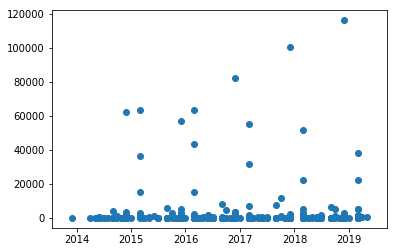

In [238]:
timestamps = pd.DataFrame({'year': tech.year,
                           'month': tech.month,
                            'days': 1})
tech['datetime'] = pd.to_datetime(timestamps)
tech.sort_values(by='datetime')
tech_mc = tech.market_cap
plt.scatter(tech.datetime, tech_mc)
tech.to_csv('tech_lse.csv')

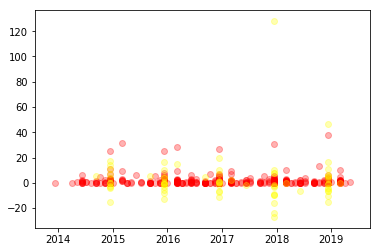

In [253]:
UK_tech.to_csv('uk_tech_lse.csv')
other_tech.to_csv('other_tech_lse.csv')
other_tech_ps = other_tech['p/s']

UK_tech_pe = UK_tech['p/s']

plt.scatter(UK_tech.datetime, UK_tech_pe, color='red', alpha=0.3)
plt.scatter(other_tech.datetime, other_tech_pe, color='yellow', alpha=0.3)

In [263]:
import sklearn.mixture as mix

companies = tech.ticker
X = np.array([float(tech[tech.ticker==c].market_cap.agg(['mean'])) for c in companies]).reshape(-1,1)

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mix.BayesianGaussianMixture(n_components=10,
                                    covariance_type='full',
                                    
                                   ).fit(X)

In [264]:
labels = dpgmm.fit_predict(X)
label_unique = np.unique(labels)

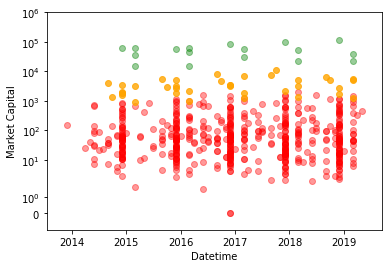

In [291]:
index1 = np.argwhere(labels==label_unique[0]).flatten()
index2 = np.argwhere(labels==label_unique[1]).flatten()
index3 = np.argwhere(labels==label_unique[2]).flatten()

tech_n = tech.reset_index(drop=True)
cluster1 = tech_n.loc[index1]
cluster2 = tech_n.loc[index2]
cluster3 = tech_n.loc[index3]

axes = plt.gca()
axes.set_ylim([-1, 1000000])

plt.scatter(cluster1.datetime, cluster1.market_cap, color='red', alpha=0.4)
plt.scatter(cluster2.datetime, cluster2.market_cap, color='green', alpha=0.4)
plt.scatter(cluster3.datetime, cluster3.market_cap, color='orange', alpha=0.8)
plt.xlabel('Datetime')
plt.ylabel('Market Capital')
plt.yscale('symlog')
plt.savefig('market_capital_clusters.pdf')